# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [2]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# cd /content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn

In [5]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [6]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [7]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
print(newdf[:5])

         id month                     project  \
0  28086120    12  Vinhomes Smart City Đại Mỗ   
1  28088954    12               Goldmark City   
2  28097966    12        Chung cư IEC Tứ Hiệp   
3  27895887    12         Vinhomes D'Capitale   
4  28056031    12           The Zen Residence   

                                            investor  square  bedrooms  \
0                                  Tập đoàn Vingroup    60.0       3.0   
1  Công ty TNHH Thương mại - Quảng cáo - Xây dựng...   121.0       3.0   
2                                                NaN    70.0       2.0   
3                               Tân Hoàng Minh Group    39.0       1.0   
4                  Công ty TNHH Gamuda Land Việt Nam    97.0       3.0   

   bathrooms direction   balcony     district        ward   price  
0        1.0  Đông-Nam   Tây-Bắc  nam tu liem      dai mo  1560.0  
1        2.0       NaN       NaN  bac tu liem    phu dien  3300.0  
2        2.0   Tây-Bắc  Đông-Nam    thanh tri     tu hie

Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

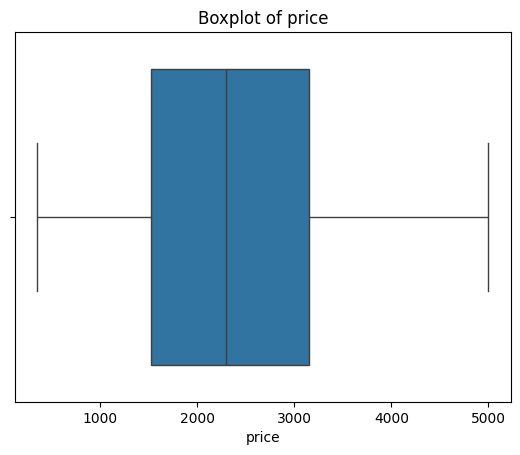

In [8]:
#Code for 'price' field
sns.boxplot(data = newdf, x = 'price')
plt.title("Boxplot of price")
plt.show()


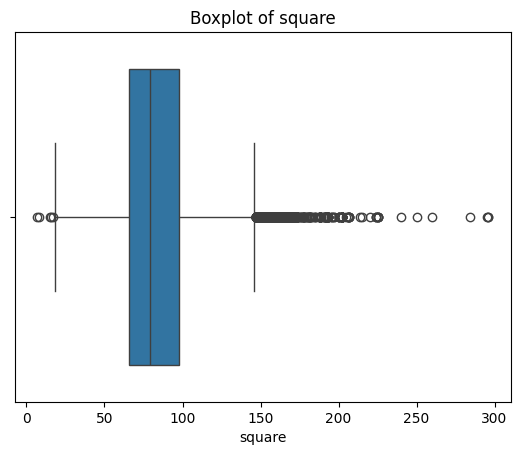

In [9]:
#Code for 'square' field
sns.boxplot(data = newdf, x = 'square')
plt.title("Boxplot of square")
plt.show()

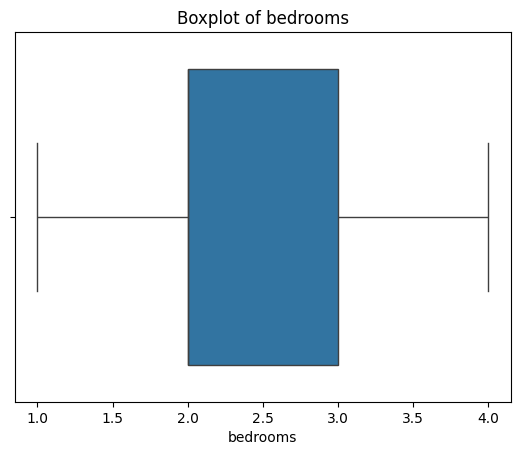

In [10]:
#Code for 'bedrooms' field
sns.boxplot(data = newdf, x = 'bedrooms')
plt.title("Boxplot of bedrooms")
plt.show()

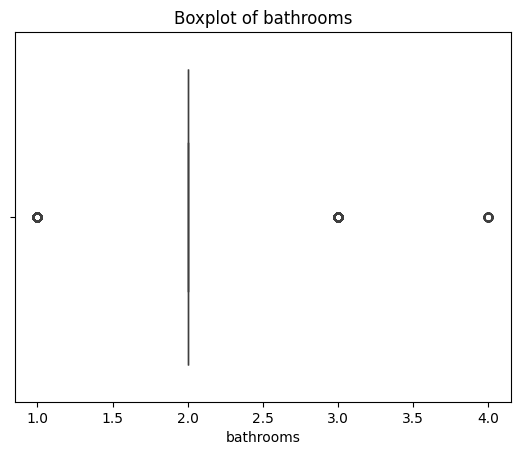

In [11]:
#Code for 'bathrooms' field
sns.boxplot(data = newdf, x = 'bathrooms')
plt.title("Boxplot of bathrooms")
plt.show()

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

C:\Users\phan\AppData\Local\Temp\ipykernel_2896\1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


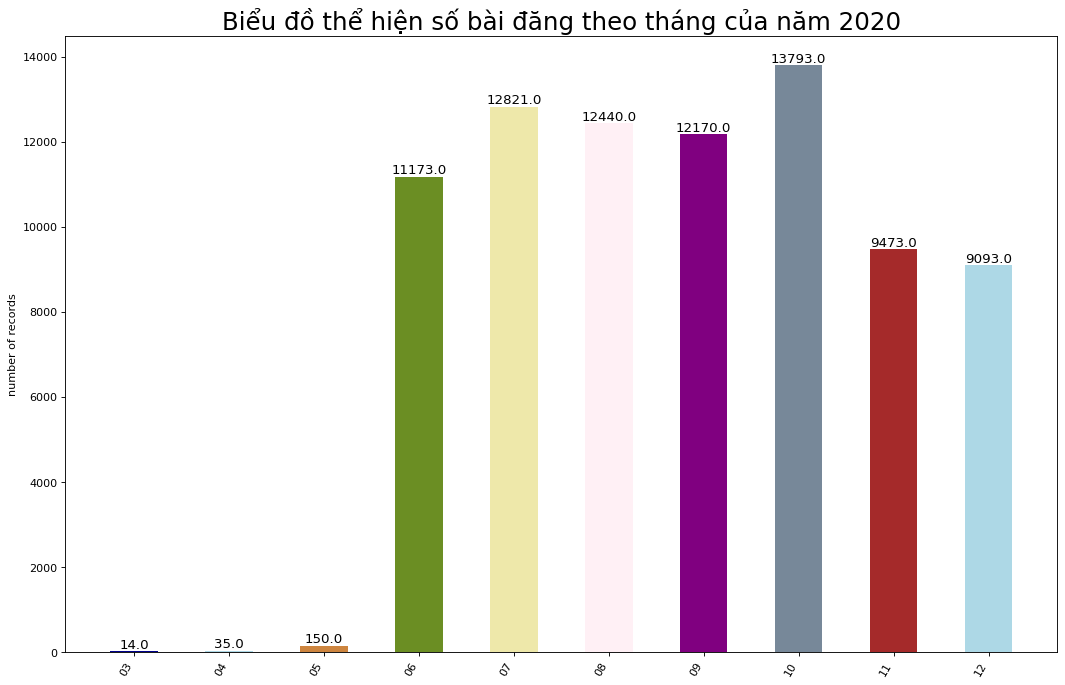

In [12]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

C:\Users\phan\AppData\Local\Temp\ipykernel_2896\493304279.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(average_price['month'], rotation=60, horizontalalignment= 'right')


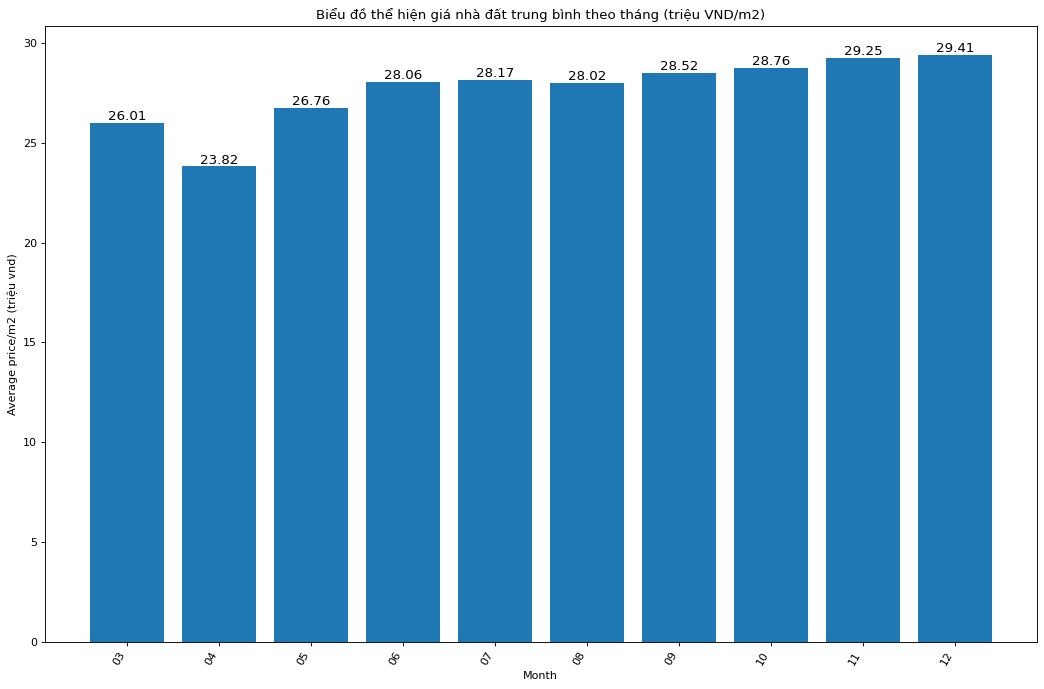

In [13]:
#Code ở đây

newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("month")["price per msqr"].mean().reset_index()
x = average_price["price per msqr"].values
plt.figure(figsize=(16,10), dpi= 80)
bar0 = plt.bar(average_price["month"], average_price["price per msqr"])
plt.xlabel("Month")
plt.ylabel("Average price/m2 (triệu vnd)")
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo tháng (triệu VND/m2)")
for i, val in enumerate(x):
    plt.text(i, val, float(round(val,2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(average_price['month'], rotation=60, horizontalalignment= 'right')
plt.show()





* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

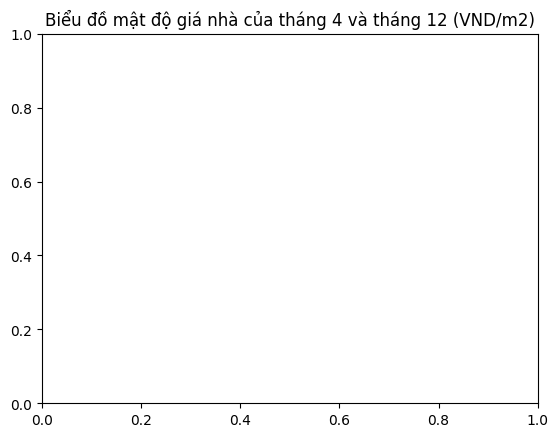

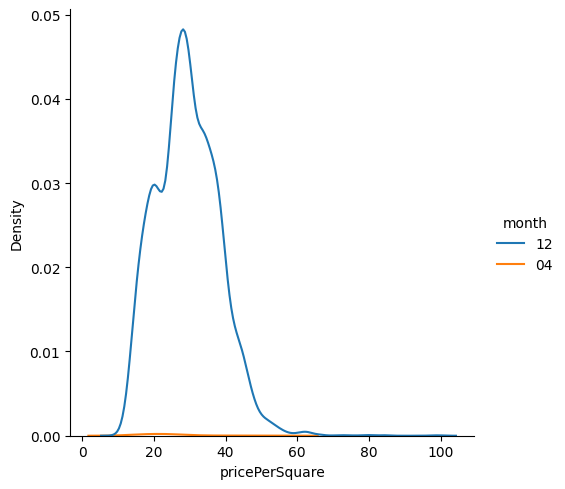

In [14]:
#Gọi ý: sns.displot()
filtered_df = newdf[newdf['month'].isin(['04', '12'])]

plt.title('Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)')
sns.displot(data = filtered_df, x = 'price per msqr', hue = 'month', kind = 'kde')
plt.xlabel('pricePerSquare')
plt.ylabel('Density')
plt.show()


* Số lượng bất động sản phân theo số lượng bedrooms

In [15]:
# sns.countplot(data=newdf, x='bedrooms')
# plt.xlabel("Num of bedrooms")
# plt.ylabel("Count")
# plt.title("Số lượng bất động sản phân theo số lượng bedrooms")
# plt.show()
newdf["bedrooms"].value_counts()



bedrooms
2.0    45317
3.0    29543
1.0     4158
4.0     2144
Name: count, dtype: int64

* Giá bất động sản trung bình theo số lượng bedrooms

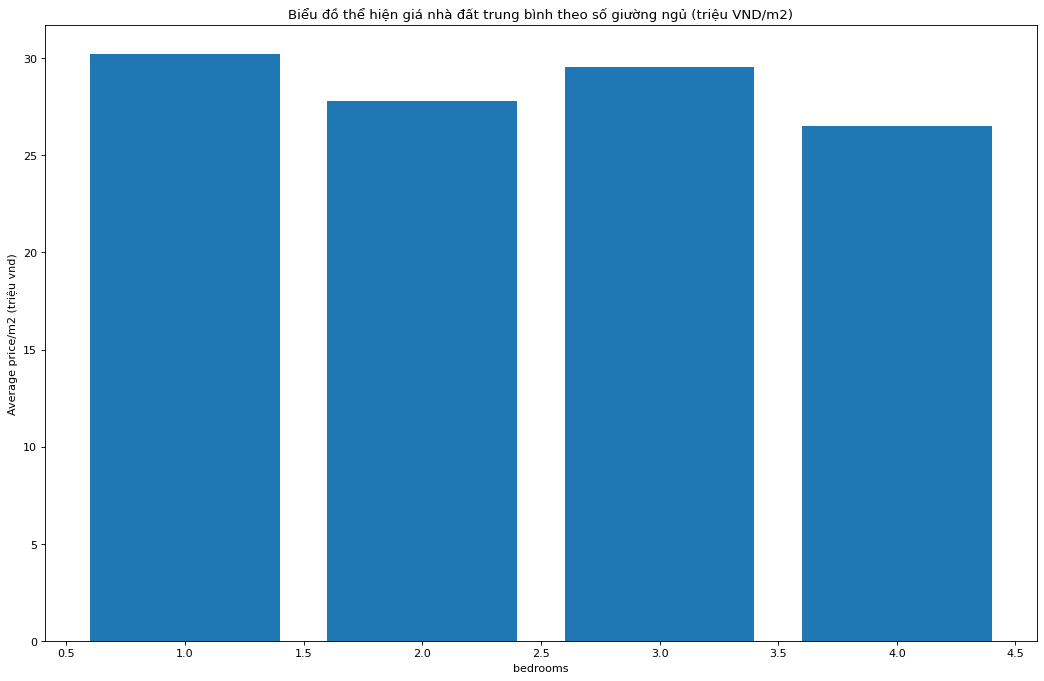

In [16]:
# Code ở đây
newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("bedrooms")["price per msqr"].mean().reset_index()
plt.figure(figsize=(16,10), dpi= 80)

bar0 = plt.bar(average_price["bedrooms"], average_price["price per msqr"])
plt.xlabel("bedrooms")
plt.ylabel("Average price/m2 (triệu vnd)")
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo số giường ngủ (triệu VND/m2)")

plt.show()


* Giá nhà đất trung bình theo quận (VND/m2)

C:\Users\phan\AppData\Local\Temp\ipykernel_2896\273206051.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(average_price['district'], rotation=60, horizontalalignment= 'right')


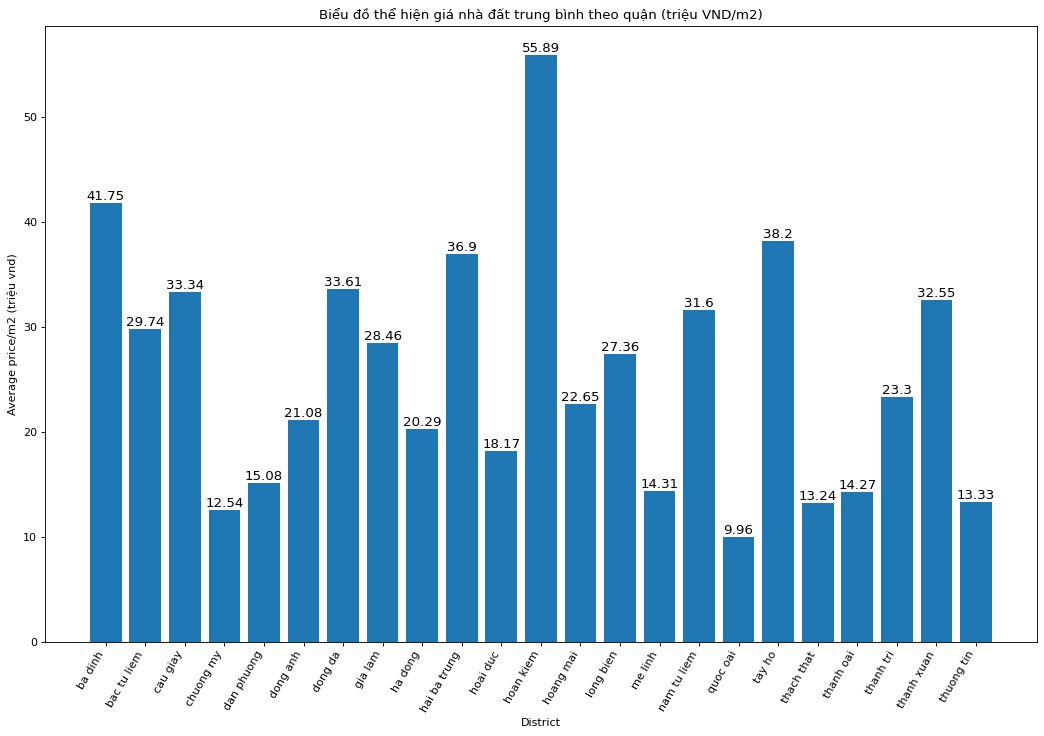

In [17]:
# Code ở đây
newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("district")["price per msqr"].mean().reset_index()
x = average_price["price per msqr"].values
plt.figure(figsize=(16,10), dpi= 80)
bar0 = plt.bar(average_price["district"], average_price["price per msqr"])
plt.xlabel("District")
plt.ylabel("Average price/m2 (triệu vnd)")
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo quận (triệu VND/m2)")
for i, val in enumerate(x):
    plt.text(i, val, float(round(val,2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(average_price['district'], rotation=60, horizontalalignment= 'right')
plt.show()

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

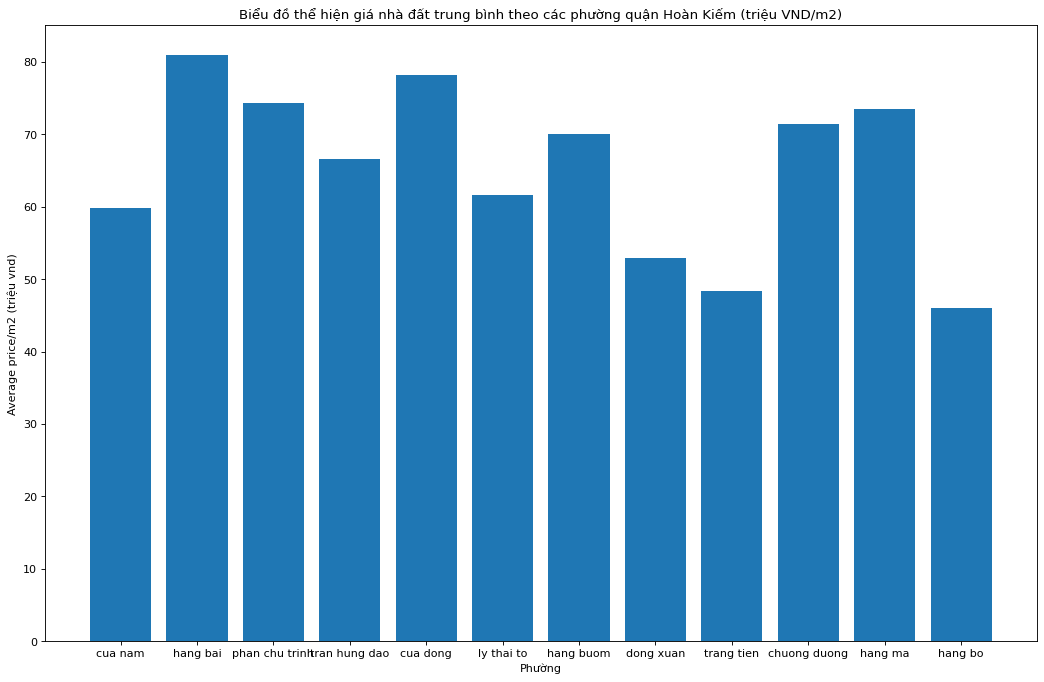

In [18]:
# Code ở đây
newdf["price per msqr"] = newdf["price"] / newdf["square"]
filtered_df = newdf[newdf['district'].isin(['hoan kiem'])]
average_price = filtered_df["price per msqr"].mean()

plt.figure(figsize=(16,10), dpi= 80)
bar0 = plt.bar(filtered_df["ward"], filtered_df["price per msqr"])
# for i, val in enumerate(x):
#     plt.text(i, val, float(round(val,2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.xlabel("Phường")
plt.ylabel("Average price/m2 (triệu vnd)")
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo các phường quận Hoàn Kiếm (triệu VND/m2)")
plt.show()



* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [19]:
# Code ở đây
newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("investor")["price per msqr"].mean().reset_index()
x = average_price["price per msqr"]
average_price.sort_values(by = "price per msqr", ascending=False)
print(average_price)
# plt.figure(figsize=(16,10), dpi= 80)
# bar0 = plt.bar(average_price["investor"], average_price["price per msqr"])

# plt.xlabel("Investor")
# plt.ylabel("Average price/m2 (triệu vnd)")
# plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo top 10 nhà đầu tư (triệu VND/m2)")
# plt.gca().set_xticklabels(average_price['investor'], rotation=60, horizontalalignment= 'right')
# plt.show()

                                              investor  price per msqr
0           Bộ Tham Mưu - Bộ Tư Lệnh Bộ Đội Biên Phòng       25.921384
1                                            C.T Group       30.880637
2                           Công TNHH Bắc Chương Dương       37.108589
3    Công Ty CP Đầu Tư Xây Dựng Và Địa Ốc  An Việt ...       29.029240
4                                     Công ty Booyoung       27.306768
..                                                 ...             ...
257  Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần       48.920344
258  Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...       32.117313
259  Tổng công ty đầu tư phát triển nhà và đô thị B...       25.951589
260                                        Vimefulland       36.425518
261           Xí nghiệp Xây dựng Tư nhân Số 1 Lai Châu       15.833885

[262 rows x 2 columns]


* Giá nhà đất trung bình theo dự án (VND/m2)

In [20]:
newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("project")["price per msqr"].mean().reset_index()
x = average_price["price per msqr"]
average_price.sort_values(by = "price per msqr", ascending=False)
print(average_price)

                       project  price per msqr
0                  6th Element       41.883108
1        A10-A14 Nam Trung Yên       29.914192
2                AQH Riverside       25.021484
3          AZ Lâm Viên Complex       27.678571
4              Amber Riverside       34.035547
..                         ...             ...
615         Xuân Phương Garden       21.000000
616      Xuân Phương Residence       25.018071
617          Xuân Phương Tasco       21.938640
618        Yên Hòa Condominium       30.206031
619  Đồng Phát Park View Tower       23.044593

[620 rows x 2 columns]


* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

In [21]:
# Code ở đây

* Giá bất động sản phân bố theo dự án

In [22]:
# Code ở đây

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

C:\Users\phan\AppData\Local\Temp\ipykernel_2896\720771870.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(average_price['direction'], rotation=60, horizontalalignment= 'right')


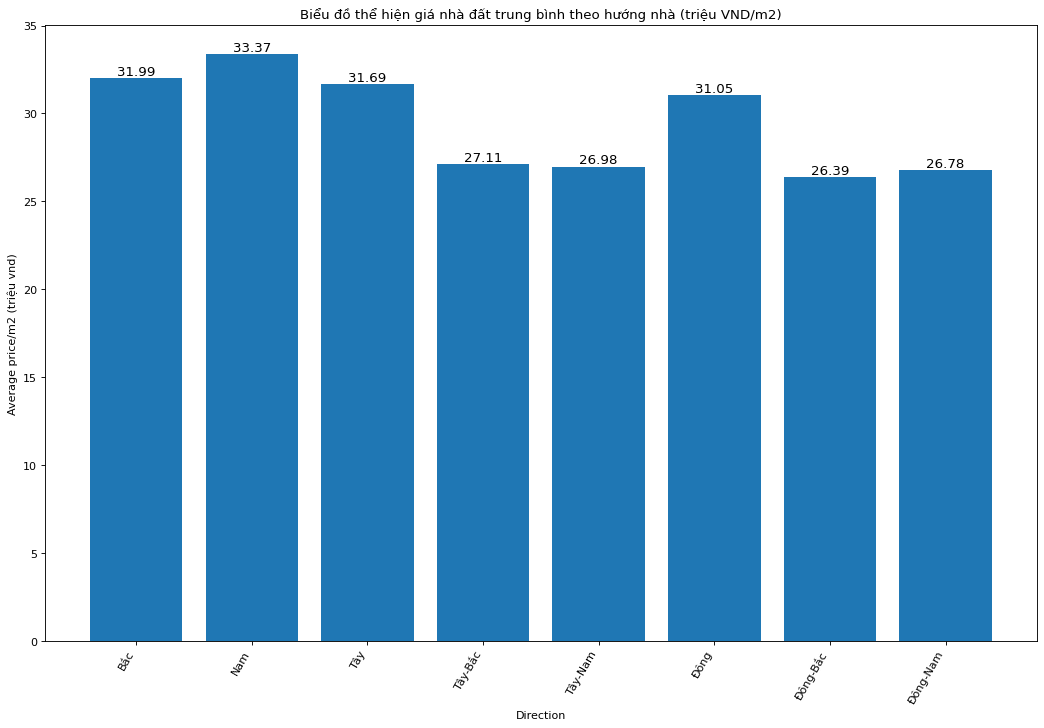

In [23]:
# Code ở đây
newdf["price per msqr"] = newdf["price"] / newdf["square"]
average_price = newdf.groupby("direction")["price per msqr"].mean().reset_index()
x = average_price["price per msqr"].values
plt.figure(figsize=(16,10), dpi= 80)
bar0 = plt.bar(average_price["direction"], average_price["price per msqr"])
plt.xlabel("Direction")
plt.ylabel("Average price/m2 (triệu vnd)")
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo hướng nhà (triệu VND/m2)")
for i, val in enumerate(x):
    plt.text(i, val, float(round(val,2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(average_price['direction'], rotation=60, horizontalalignment= 'right')
plt.show()

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

<Axes: >

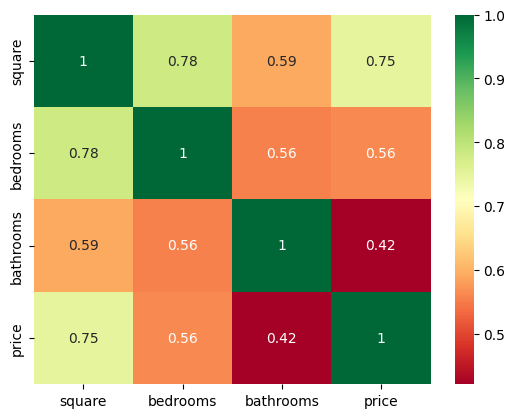

In [24]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
numeric_columns = ['square','bedrooms','bathrooms','price']
correlation_matrix = newdf[numeric_columns].corr()
sns.heatmap(correlation_matrix,annot=True, cmap='RdYlGn')


* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

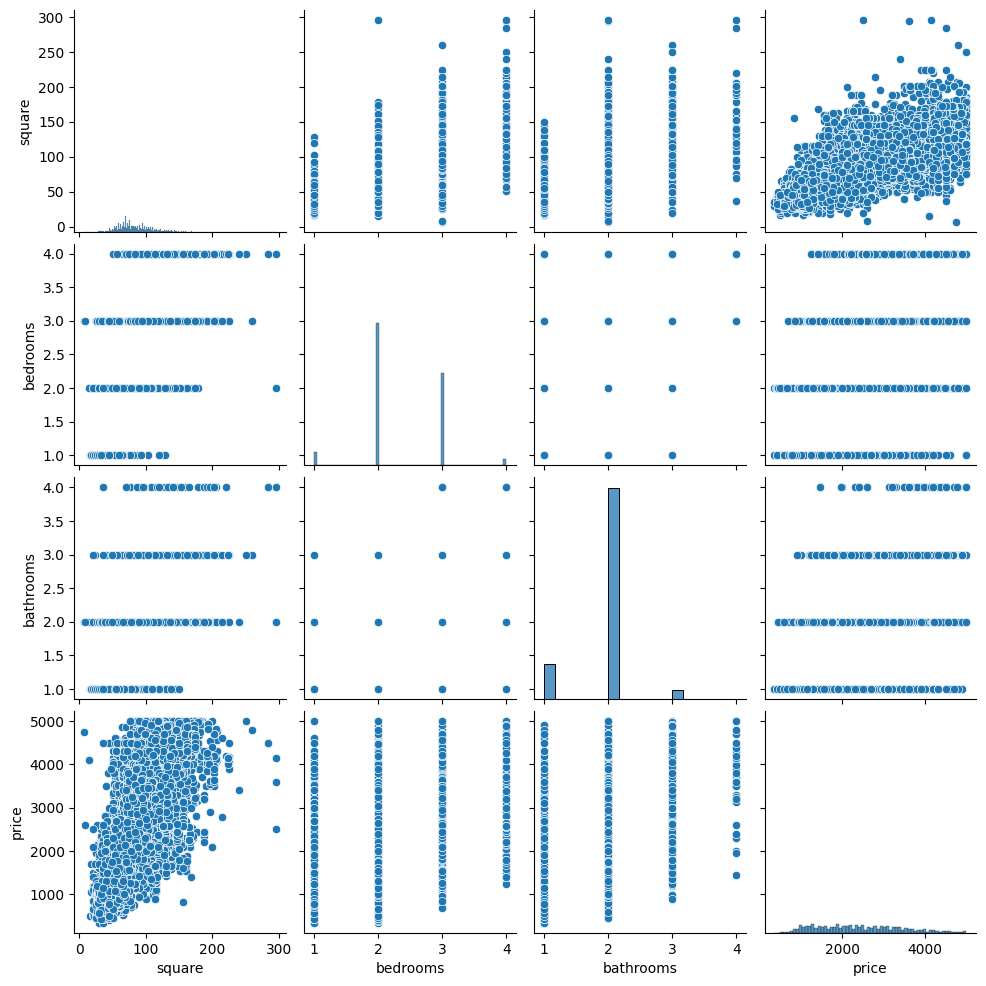

In [27]:
#Gợi ý: sns.pairplot(kind='scatter', ...)
sns.pairplot(newdf[numeric_columns],kind='scatter')


4. Mật độ giá nhà trung bình theo quận 

In [26]:
#Gợi ý: sns.displot()


End :))